In [1]:
from fast import *
from fast.config import fast_path
from matplotlib import pyplot
from sympy import sin,cos,exp,sqrt,pi,zeros,I
from numpy import array
%matplotlib inline
init_printing()
print_ascii=True; print_ascii=False

In [2]:
path=fast_path[:-5]+"/examples/folder_07___Three_level_atom_Lambda_symbolic/" 
name='suite'

We will be deriving the optical Bloch equations for a three level system in a Lambda configuration as that in the figure.

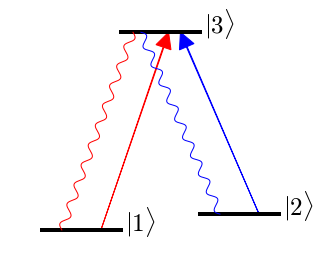

In [3]:
fig=pyplot.figure(); ax=fig.add_subplot(111,aspect="equal")

p1=[0.5,1]; p2=[2.5,1.2]; p3=[1.5,3.5]
draw_state(ax,p1,text=r"$|1\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)
draw_state(ax,p2,text=r"$|2\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)
draw_state(ax,p3,text=r"$|3\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)

excitation(ax,[p1[0]+0.25,p1[1]],[p3[0]+0.10,p3[1]], fc="r", ec="r",width=0.01, head_width=0.2, head_length=0.2)
excitation(ax,[p2[0]+0.25,p2[1]],[p3[0]+0.25,p3[1]], fc="b", ec="b",width=0.01, head_width=0.2, head_length=0.2)

decay(     ax,[p1[0]-0.25,p1[1]],[p3[0]-0.35,p3[1]], 0.05,10.0,color="r",linewidth=1.0)
decay(     ax,[p2[0]-0.25,p2[1]],[p3[0]-0.25,p3[1]], 0.05,10.0,color="b",linewidth=1.0)

pyplot.axis('off')
pyplot.savefig(path+name+'_diagram.png',bbox_inches="tight")

We define the number of states and of radiation fields.

In [4]:
Ne=3
Nl=2

We define the variables related to the laser field.

In [5]:
E0,omega_laser=define_laser_variables(Nl)
fprint(E0,print_ascii=print_ascii)

In [6]:
fprint(omega_laser, print_ascii=print_ascii)

We define a few important symbols.

In [7]:
t,hbar,e=symbols("t hbar e",positive=True)
fprint([t,hbar,e], print_ascii=print_ascii)

We write two electric fields propagating trough the $\hat{x}$ direction polarized in the $\hat{z}$ direction. First the wave vectors:

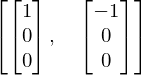

In [8]:
phi1=0 ; theta1=pi/2; alpha1=pi/2; beta1=0
phi2=pi; theta2=pi/2; alpha2=pi/2; beta2=0

k1=Matrix([cos(phi1)*sin(theta1),sin(phi1)*sin(theta1),cos(theta1)])
k2=Matrix([cos(phi2)*sin(theta2),sin(phi2)*sin(theta2),cos(theta2)])

fprint([k1,k2],print_ascii=print_ascii)

The polarization vectors.

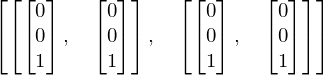

In [9]:
ep1=polarization_vector(phi1,theta1,alpha1,beta1, 1)
ep2=polarization_vector(phi2,theta2,alpha2,beta2, 1)

em1=ep1.conjugate()
em2=ep2.conjugate()

ep=[ep1,ep2]
em=[em1,em2]

fprint([ep,em], print_ascii=print_ascii)

The electric field (evaluated in $\vec{R}=0$).

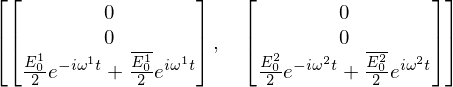

In [10]:
zero_vect=Matrix([0,0,0])
E_cartesian = [(E0[l]*ep[l]*exp(-I*omega_laser[l]*t) + E0[l].conjugate()*em[l]*exp( I*omega_laser[l]*t))/2 
                    for l in range(Nl)]

fprint(E_cartesian, print_ascii=print_ascii)

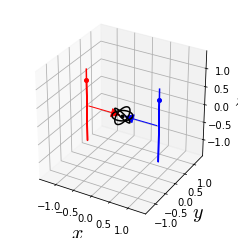

In [11]:
l1=PlaneWave(phi1,theta1,alpha1,beta1,color="red")
l2=PlaneWave(phi2,theta2,alpha2,beta2,color="blue")

laseres=[l1,l2]
Nl=len(laseres)

fig = pyplot.figure(); ax = fig.gca(projection='3d')
draw_lasers_3d(ax,laseres,path+'lasers.png')

We write the electric field in the helicity basis (see notebook "Vectors in the helicity basis and the electric field").

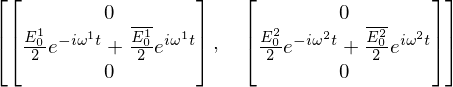

In [12]:
E=[cartesian_to_helicity(E_cartesian[l]) for l in range(Nl)]
fprint(E, print_ascii=print_ascii)

We define the position operator.

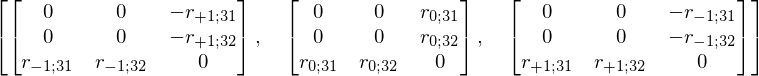

In [13]:
r=define_r_components(Ne,helicity=True,explicitly_hermitian=True)
#Ladder means that r_{p;31}=0
r=[ri.subs({r[0][1,0]:0,r[1][1,0]:0,r[2][1,0]:0}) for ri in r]
fprint(r, print_ascii=print_ascii)

The frequencies of the energy levels, the resonant frequencies, and the decay frequencies.

In [14]:
omega_level,omega,gamma=define_frequencies(Ne,explicitly_antisymmetric=True)
#Ladder means gamma31=0
gamma=gamma.subs({gamma[1,0]:0})

fprint(omega_level, print_ascii=print_ascii)

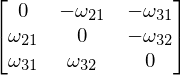

In [15]:
fprint(omega, print_ascii=print_ascii)

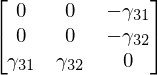

In [16]:
fprint(gamma, print_ascii=print_ascii)

The atomic hamiltonian is

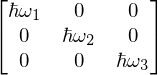

In [17]:
H0=Matrix([[hbar*omega_level[i]*KroneckerDelta(i,j) for j in range(Ne)] for i in range(Ne)])
fprint(H0, print_ascii=print_ascii)

The interaction hamiltonian is

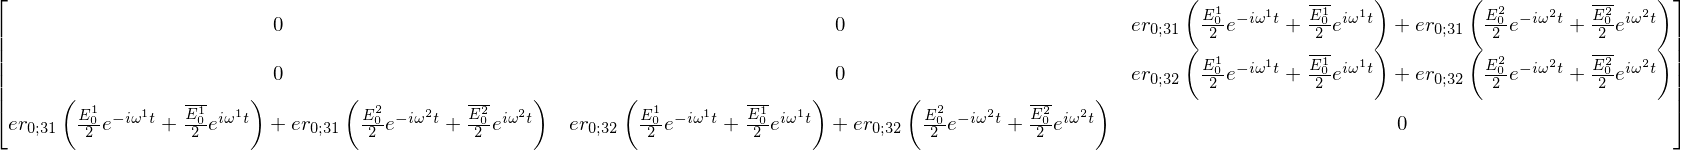

In [18]:
zero_matrix=zeros(Ne,Ne)
H1=sum([ e*helicity_dot_product(E[l],r) for l in range(Nl)],zero_matrix)
fprint(H1,print_ascii=print_ascii)

and the complete hamiltonian is

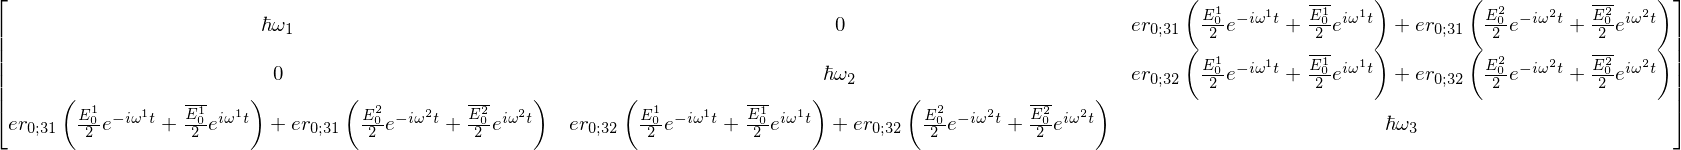

In [19]:
H=H0+H1
fprint(H,print_ascii=print_ascii)

# Rotating wave approximation
Notice that the electric field can be separated by terms with positive and negative frequency:

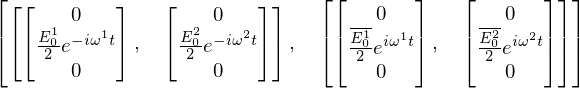

In [20]:
E_cartesian_p=[E0[l]/2*ep[l]*exp(-I*omega_laser[l]*t) for l in range(Nl)]
E_cartesian_m=[E0[l].conjugate()/2*em[l]*exp( I*omega_laser[l]*t) for l in range(Nl)]

E_p=[cartesian_to_helicity(E_cartesian_p[l]) for l in range(Nl)]
E_m=[cartesian_to_helicity(E_cartesian_m[l]) for l in range(Nl)]

fprint([E_p,E_m], print_ascii=print_ascii)

In [21]:
fprint( simplify(sum([E[l] for l in range(Nl)],zero_vect)-(sum([E_p[l]+E_m[l] for l in range(Nl)],zero_vect) )), print_ascii=print_ascii)

The position operator can also be separated in this way. We go to the interaction picture (with $\hat{H}_0$ as the undisturbed hamiltonian)

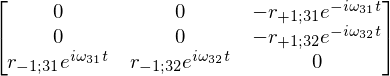

In [22]:
r_I=[ Matrix([[exp(I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)] for i in range(Ne)]) for p in range(3)]
fprint(r_I[0], print_ascii=print_ascii)

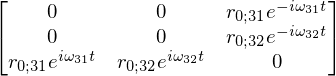

In [23]:
fprint(r_I[1], print_ascii=print_ascii)

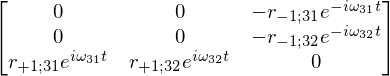

In [24]:
fprint(r_I[2], print_ascii=print_ascii)

Which can be decomposed in positive and negative frequencies as

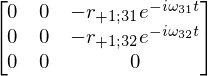

In [25]:
r_I_p=[ Matrix([[ delta_greater(j,i)*exp(-I*omega[j,i]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_I_p[0], print_ascii=print_ascii)

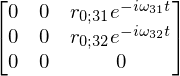

In [26]:
fprint(r_I_p[1], print_ascii=print_ascii)

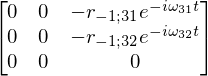

In [27]:
fprint(r_I_p[2], print_ascii=print_ascii)

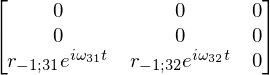

In [28]:
r_I_m=[ Matrix([[ delta_lesser( j,i)*exp( I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_I_m[0], print_ascii=print_ascii)

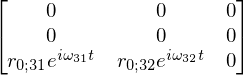

In [29]:
fprint(r_I_m[1], print_ascii=print_ascii)

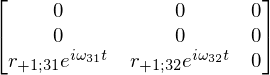

In [30]:
fprint(r_I_m[2], print_ascii=print_ascii)

that summed equal $\vec{\hat{r}}_I$

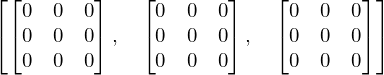

In [31]:
fprint( [r_I[p]-(r_I_p[p]+r_I_m[p]) for p in range(3)] , print_ascii=print_ascii)

Thus the interaction hamiltonian in the interaciton picture is
\begin{equation}
    \hat{H}_{1I}=e\vec{E}\cdot \vec{\hat{r}}_I= e(\vec{E}^{(+)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(-)}_I)
\end{equation}

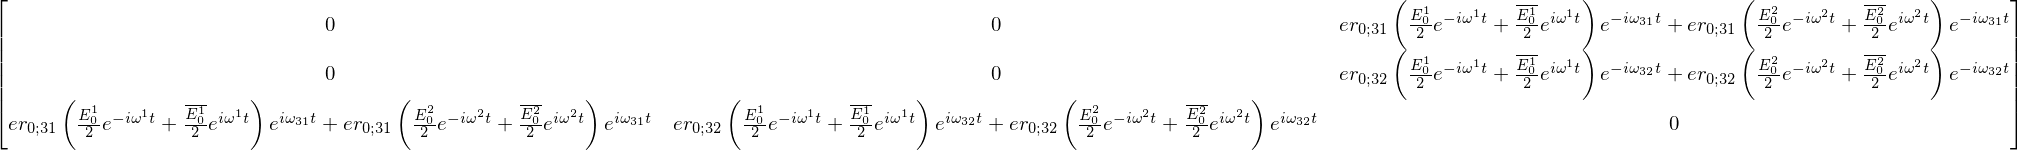

In [32]:
H1I=sum([ e*helicity_dot_product(E[l],r_I) for l in range(Nl)],zero_matrix)
fprint(H1I, print_ascii=print_ascii)

Since both $\omega^l$ and $\omega_{ij}$ are in the order of THz, the terms that have frequencies with the same sign are summed, and thus also of the order of THz. The frequencies in the terms with oposite signs however, are detunings of the order of MHz. Since we are only interested in the coarse-grained evolution of the density matrix, we may omit the fast terms and approximate

\begin{equation}
    \hat{H}_{1I} \simeq \hat{H}_{1I,RWA}= e( \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I )
\end{equation}

That is known as the rotating wave approximation (RWA).

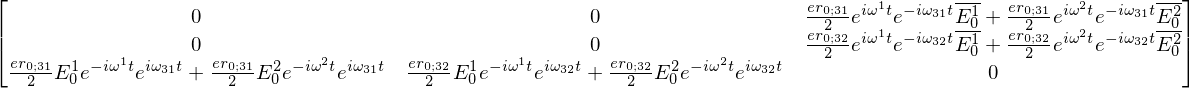

In [33]:
H1IRWA=sum( [ (e*(helicity_dot_product(E_p[l],r_I_m)+helicity_dot_product(E_m[l],r_I_p))) for l in range(Nl)],zero_matrix)
fprint(H1IRWA, print_ascii=print_ascii)

The matrix element $(\hat{H}_{1I,RWA})_{31}$ element is

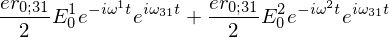

In [34]:
fprint(H1IRWA[2,0].expand(), print_ascii=print_ascii)

But if the detuning $\omega_{31}-\omega^1 \ll \omega_{31}-\omega^2$ (the second field is far detuned from the $1 \rightarrow 3$ transition), then $\omega_{31}-\omega^2$ may be also considered too high a frequency to be relevant to coarse-grained evolution. So we might neclect that term in $(\hat{H}_{1I,RWA})_{31}$ and similarly neglect the $\omega_{32}-\omega^1$ for term in $(\hat{H}_{1I,RWA})_{32}$:

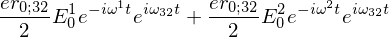

In [35]:
fprint(H1IRWA[2,1].expand(), print_ascii=print_ascii)

In other words, if the detunings in our experiments allow the approximmation, we might choose which frequency components $\omega^l$ excite which transitions. Let us say that $L_{ij}$ is the set of $l$ such that $\omega^l$ excites the transition $i\rightarrow j$

In [36]:
Lij=[[1,3,[1]],[2,3,[2]]]
Lij=formatLij(Lij,Ne)
print array(Lij)

[[[] [] [1]]
 [[] [] [2]]
 [[1] [2] []]]


Thus the interacion hamiltonian in the interaction picture can be approximated as

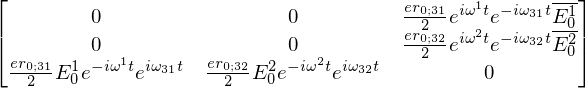

In [37]:
H1IRWA =sum([ e*( helicity_dot_product( E_p[l],vector_element(r_I_m,i,j)) ) * ket(i+1,Ne)*bra(j+1,Ne) 
            for l in range(Nl) for j in range(Ne) for i in range(Ne) if l+1 in Lij[i][j] ],zero_matrix)
H1IRWA+=sum([ e*( helicity_dot_product( E_m[l],vector_element(r_I_p,i,j)) ) * ket(i+1,Ne)*bra(j+1,Ne) 
            for l in range(Nl) for j in range(Ne) for i in range(Ne) if l+1 in Lij[i][j] ],zero_matrix)

fprint(H1IRWA, print_ascii=print_ascii)

Returning to the Schrödinger picture we have.

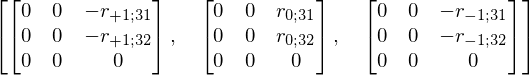

In [38]:
r_p=[ Matrix([[ delta_greater(j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_p, print_ascii=print_ascii)

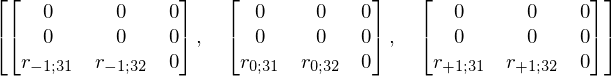

In [39]:
r_m=[ Matrix([[ delta_lesser( j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
fprint(r_m, print_ascii=print_ascii)

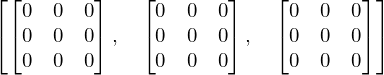

In [40]:
fprint( [r[p]-(r_p[p]+r_m[p]) for p in range(3)] , print_ascii=print_ascii)

Thus the interaction hamiltonian in the Schrödinger picture in the rotating wave approximation is

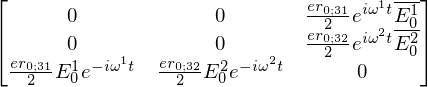

In [41]:
H1RWA =sum([ e*( helicity_dot_product( E_p[l],vector_element(r_m,i,j)) ) * ket(i+1,Ne)*bra(j+1,Ne) 
            for l in range(Nl) for j in range(Ne) for i in range(Ne) if l+1 in Lij[i][j] ],zero_matrix)
H1RWA+=sum([ e*( helicity_dot_product( E_m[l],vector_element(r_p,i,j)) ) * ket(i+1,Ne)*bra(j+1,Ne) 
            for l in range(Nl) for j in range(Ne) for i in range(Ne) if l+1 in Lij[i][j] ],zero_matrix)

fprint(H1RWA, print_ascii=print_ascii)

And the complete hamiltonian in the Schrödinger picture in the rotating wave approximation is

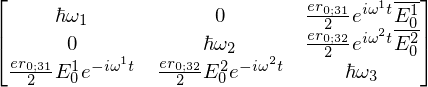

In [42]:
HRWA=H0+H1RWA
fprint(HRWA, print_ascii=print_ascii)

# Rotating Frame
Next we will make a phase transformation in order to eliminate the explicit time dependance of the equations.

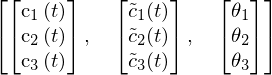

In [43]:
c,ctilde,phase=define_psi_coefficients(Ne)
fprint([c,ctilde,phase], print_ascii=print_ascii)

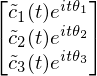

In [44]:
psi=Matrix([ exp(I*phase[i]*t)*ctilde[i] for i in range(Ne)])
fprint(psi, print_ascii=print_ascii)

The Schrödinger equation $i\hbar \partial_t |\psi\rangle=\hat{H}_{RWA}$ is

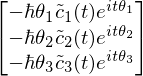

In [45]:
lhs=Matrix([(I*hbar*Derivative(psi[i],t).doit()).expand() for i in range(Ne)])
fprint(lhs, print_ascii=print_ascii)

In [46]:
rhs=HRWA*psi

We multiply each of these equations by $e^{-i \theta_i t}$ and substracting $i \theta_i \tilde{c}_i$

In [47]:
lhs_new=Matrix([simplify(  lhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
fprint(lhs_new, print_ascii=print_ascii)

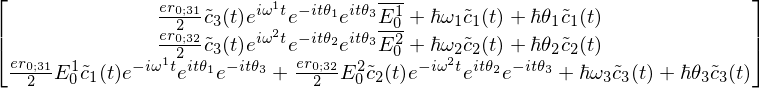

In [48]:
rhs_new=Matrix([simplify(  rhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
fprint(rhs_new, print_ascii=print_ascii)

It can be seen that the equations loose their explicit time dependance only if $\omega^{1} - \theta_{1} + \theta_{3}=0$ and $\omega^{2} - \theta_{2} + \theta_{3}=0$. Which is satisfied if

In [49]:
phase_transformation=solve([omega_laser[0]-phase[0]+phase[2],omega_laser[1]-phase[1]+phase[2]],[phase[1],phase[2]],
                           dict=True)[0]
fprint(phase_transformation, print_ascii=print_ascii)

There is a free parameter $\theta_1$, which is to be expected, since state vetors $|\psi\rangle$ always have a global phase invariance

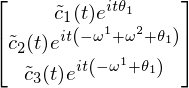

In [50]:
fprint(psi.subs(phase_transformation), print_ascii=print_ascii)

Thus the equations become

In [51]:
fprint(lhs_new, print_ascii=print_ascii)

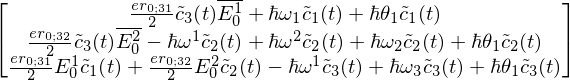

In [52]:
rhs_new=simplify(rhs_new.subs(phase_transformation)).expand()
fprint(rhs_new, print_ascii=print_ascii)

It can be seen that this is the Schrödinger equation derived from an effective hamiltonian $\tilde{H}$

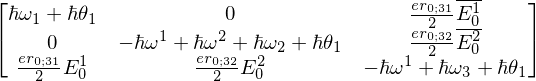

In [53]:
Htilde=Matrix([ [Derivative(rhs_new[i],ctilde[j]).doit() for j in range(Ne)] for i in range(Ne)])
fprint(Htilde, print_ascii=print_ascii)

We can see that it is convenient to choose $\theta_1=-\omega_1$ to simplify the hamiltonian. Also, we can recognize $\omega^1-\omega_3+\omega_1=\delta^1$ as the detuning of the first field relative to the atomic transition $\omega_{21}=\omega_2-\omega_1$, and the same for $\omega^2-\omega_3+\omega_2=\delta^2$.

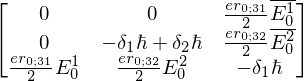

In [54]:
delta1,delta2=symbols("delta1 delta2",real=True)
Htilde=Htilde.subs({phase[0]:-omega_level[0]})
Htilde=Htilde.subs({omega_laser[0]:delta1+omega_level[2]-omega_level[0]})
Htilde=Htilde.subs({omega_laser[1]:delta2+omega_level[2]-omega_level[1]})

Htilde=Htilde.expand()

fprint(Htilde, print_ascii=print_ascii)

If we define the Rabi frequencies $\Omega_1 =e E_0^1 r_{0;21}/\hbar$ and $\Omega_2 =e E_0^2 r_{0;32}/\hbar$

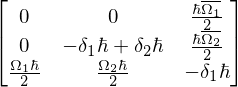

In [55]:
Omega1,Omega2=symbols("Omega1 Omega2",real=True)
Omega1,Omega2=symbols("Omega1 Omega2")
Htilde=Htilde.subs({E0[0]:Omega1*hbar/r[1][2,0]/e})
Htilde=Htilde.subs({E0[1]:Omega2*hbar/r[1][2,1]/e})

fprint(Htilde, print_ascii=print_ascii)

We define the density matrix.

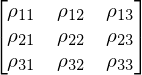

In [56]:
rho=define_density_matrix(Ne)
fprint( rho , print_ascii=print_ascii)

The hamiltonian part of the equations is
\begin{equation}
    \dot{\hat{\rho}}=\frac{i}{\hbar}[\hat{\rho}, \hat{\tilde{H}}]
\end{equation}

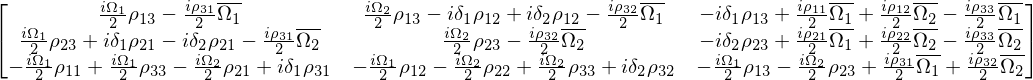

In [57]:
hamiltonian_terms=(I/hbar*(rho*Htilde-Htilde*rho)).expand()
fprint(hamiltonian_terms, print_ascii=print_ascii)

There are two Lindblad operators, since there are two spontaneous decay channels.

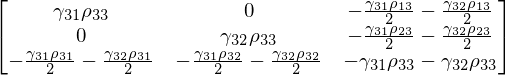

In [58]:
lindblad_terms =gamma[2,0]*lindblad_operator(ket(1,Ne)*bra(3,Ne),rho)
lindblad_terms+=gamma[2,1]*lindblad_operator(ket(2,Ne)*bra(3,Ne),rho)

fprint(lindblad_terms, print_ascii=print_ascii)

# Optical Bloch Equations
The Optical Bloch equations are thus.

In [59]:
eqs=hamiltonian_terms + lindblad_terms

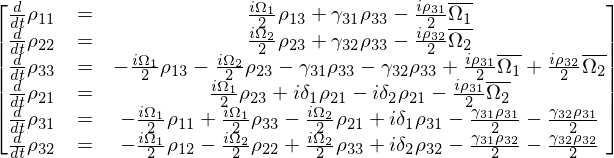

In [60]:
eqsign=symbols("=")
eqs_list=[]
for mu in range(0,Ne**2-1 -(Ne**2 - Ne)/2+1):
    ii,jj,s=IJ(mu,Ne)
    i=ii-1; j=jj-1
    eqs_list+=[[Derivative(rho[i,j],t),eqsign,eqs[i,j]]]
eqs_list=Matrix(eqs_list)
fprint(eqs_list, print_ascii=print_ascii)

which is how most literature will show the equations. However, a more convenient way to express this equations is to explicitly asume a normalized and hermitian density matrix

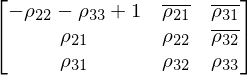

In [61]:
rho=define_density_matrix(Ne,explicitly_hermitian=True,normalized=True)
fprint( rho , print_ascii=print_ascii)

In [62]:
hamiltonian_terms = (I/hbar*(rho*Htilde-Htilde*rho)).expand()
lindblad_terms    =gamma[1,0]*lindblad_operator(ket(1,Ne)*bra(2,Ne),rho)
lindblad_terms   +=gamma[2,1]*lindblad_operator(ket(2,Ne)*bra(3,Ne),rho)

eqs=hamiltonian_terms + lindblad_terms

and only consider the equations for the populations $\rho_{ii}$ for $i>1$ and the real and imaginary parts of the coherences below the diagonal.

If the density matrix is represented as a vector whose components are the these independent components of the density matrix

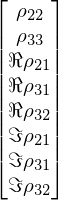

In [63]:
rho_vect=define_rho_vector(rho,Ne)
fprint(rho_vect, print_ascii=print_ascii)

Then the equations can be re-written as linear combinations of these components plus an independent term.
\begin{equation}
    \dot{\vec{\rho}} = \hat{A} \vec{\rho} - \vec{b}
\end{equation}
with $\hat{A}$ a linear operator acting in this vector space and $\vec{b}$ the vector of independent terms.

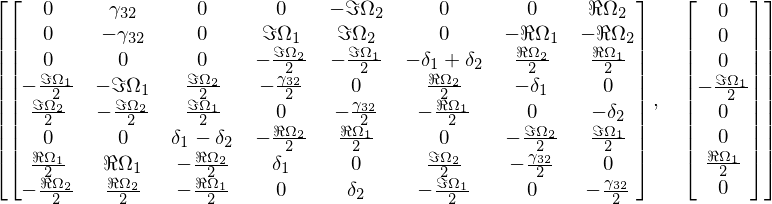

In [64]:
A,b=calculate_A_b(eqs,rho,Ne)
fprint([A,b], print_ascii=print_ascii)

Explicitly, this is

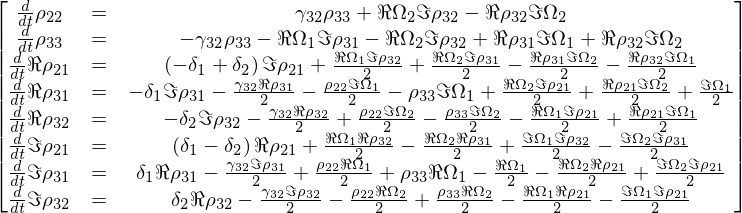

In [65]:
eqs_new=A*rho_vect - b

eqs_list=[]
for mu in range(0,Ne**2-1 ):
    eqs_list+=[[Derivative(rho_vect[mu],t),eqsign,eqs_new[mu]]]
eqs_list=Matrix(eqs_list)
fprint(eqs_list, print_ascii=print_ascii)

Which is the same as the equations in the previous form.

In [66]:
ss_comp={ rho[i,j]:re(rho[i,j])+I*im(rho[i,j]) for j in range(Ne) for i in range(Ne)}

test= (eqs_new - Matrix([re(eqs[1,1]),re(eqs[2,2]),
                          re(eqs[1,0]),re(eqs[2,0]),re(eqs[2,1]),
                          im(eqs[1,0]),im(eqs[2,0]),im(eqs[2,1])])).expand()

test=test.subs(ss_comp)
fprint(test,print_ascii=print_ascii)

[1]  H.J. Metcalf and P. van der Straten. Laser Cooling and Trapping. Graduate Texts in Contempo-
rary Physics. Springer New York, 2001.

[2] Daniel Adam Steck. Quantum and Atom Optics. Oregon Center for Optics and Department of Physics, University of Oregon Copyright © 200